In [1]:
# Nama : Mia Amaliah
# NIM  :
# Tugas : Discriminant Analysis

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/star-type-classification/Stars.csv


In [2]:
stars = pd.read_csv('../input/star-type-classification/Stars.csv')
stars.head()


,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [3]:
stars.shape


(240, 7)

In [4]:
stars.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

In [5]:
stars.dtypes

Temperature         int64
L                 float64
R                 float64
A_M               float64
Color              object
Spectral_Class     object
Type                int64
dtype: object

In [6]:
stars.drop(['Color'],axis=1,inplace=True)

In [7]:
stars ['Spectral_Class'] = stars ['Spectral_Class'].replace ({'A':0,'B':1,'F':2,'M':3,'O':4,'K':5,'G':6})
stars.head ()

,Temperature,L,R,A_M,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,3,0
1,3042,0.000500,0.1542,16.60,3,0
2,2600,0.000300,0.1020,18.70,3,0
3,2800,0.000200,0.1600,16.65,3,0
4,1939,0.000138,0.1030,20.06,3,0


In [8]:
stars['Spectral_Class'] = stars.Spectral_Class.astype(int)
stars.dtypes

Temperature         int64
L                 float64
R                 float64
A_M               float64
Spectral_Class      int64
Type                int64
dtype: object

In [9]:
stars.describe()

,Temperature,L,R,A_M,Spectral_Class,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.537500,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.283403,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,3.000000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,3.000000,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,6.000000,5.000000


In [10]:
x = stars.iloc[:, 0:5].values
y = stars.iloc[:, 5].values
print (x)
print (y)
 

[[ 3.06800e+03  2.40000e-03  1.70000e-01  1.61200e+01  3.00000e+00]
 [ 3.04200e+03  5.00000e-04  1.54200e-01  1.66000e+01  3.00000e+00]
 [ 2.60000e+03  3.00000e-04  1.02000e-01  1.87000e+01  3.00000e+00]
 ...
 [ 8.82900e+03  5.37493e+05  1.42300e+03 -1.07300e+01  0.00000e+00]
 [ 9.23500e+03  4.04940e+05  1.11200e+03 -1.12300e+01  0.00000e+00]
 [ 3.78820e+04  2.94903e+05  1.78300e+03 -7.80000e+00  4.00000e+00]]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5
 5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4
 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5]


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [12]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [13]:
lda = LDA(n_components = 2)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)
print (x_train)
print (y_train)

[[-7.34383826 -1.79331471]
 [ 2.78849246  3.90915312]
 [12.04755077 -2.8901402 ]
 [-8.09770632 -2.20480349]
 [-6.43653759 -1.24596655]
 [10.06561731 -2.38346506]
 [ 5.55733988  4.99265284]
 [ 2.17749439  3.56650258]
 [ 6.31945036  5.5703515 ]
 [-3.72467181  0.14505213]
 [-7.13730175 -1.69421124]
 [ 6.80281074  5.80221285]
 [-5.5922842  -0.63538421]
 [ 2.7038357   4.38803589]
 [ 2.94099362  4.46099504]
 [-6.93888551 -1.57696999]
 [15.52364203 -5.81470789]
 [-3.90678856  0.03672164]
 [-4.22230281 -0.12968304]
 [-4.10547969 -0.06178222]
 [ 8.59139868 -0.05774818]
 [ 5.60774882  5.2344779 ]
 [11.8360711  -4.3689169 ]
 [-3.83937608  0.07612039]
 [-6.08793296 -1.06318494]
 [11.47142074 -3.95522272]
 [12.25535824 -5.30451354]
 [-8.12359173 -2.21946011]
 [-7.45079305 -1.84827731]
 [-5.41743665 -0.62504279]
 [-7.27617784 -1.76535918]
 [-6.09750891 -1.1352467 ]
 [ 5.74373167  5.58770902]
 [-7.31322497 -1.78127121]
 [ 6.09557723  5.56465072]
 [-4.39015196 -0.2266873 ]
 [-6.34297103 -1.18854573]
 

In [14]:
print (x_test)

[[ 4.06151021  4.62041977]
 [-3.52087342  0.25385275]
 [ 0.23973825  2.29999079]
 [-3.95018312  0.02394297]
 [ 4.69356706  4.64624598]
 [ 6.13022513  6.23073488]
 [ 2.59887219  3.88905213]
 [ 4.77571976  5.01602766]
 [ 2.3377554   3.49538364]
 [-4.81402998 -0.43911502]
 [-5.34973617 -0.73674425]
 [-5.67871047 -0.70976106]
 [-5.95542043 -0.81673988]
 [ 2.78442571  3.85245399]
 [10.03120727 -2.57569766]
 [-5.8261999  -0.98341618]
 [-7.4244218  -1.83492456]
 [12.60081088 -2.17937323]
 [ 6.19378437  5.26570546]
 [-7.57691444 -1.93174834]
 [ 4.1154543   5.83516619]
 [ 9.69130648 -3.3350405 ]
 [-5.51489881 -0.53164682]
 [-9.06100424 -2.71540792]
 [-7.32578164 -1.79383358]
 [-6.17492687 -1.10750319]
 [-6.12751296 -1.14667422]
 [ 0.42412989  2.41993537]
 [-5.22618269 -0.66566177]
 [ 4.75964502  4.45162279]
 [14.12344298 -3.45248072]
 [ 5.95542774  5.39341912]
 [-4.97864128 -0.37216957]
 [-8.84218094 -2.59828697]
 [-4.98818455 -0.39737126]
 [13.63247167 -4.83327644]
 [-6.83765188 -1.4540438 ]
 

In [15]:
model = LDA()
model.fit (x_train,y_train)

LinearDiscriminantAnalysis()

In [16]:
y_prediksi = model.predict(x_test)
print (y_prediksi)

[4 1 3 1 4 4 3 4 3 1 2 2 2 3 5 2 0 5 4 0 4 5 2 0 0 2 2 3 2 4 5 4 1 0 1 5 0
 5 0 3 3 4 3 2 4 2 4 0 5 5 0 3 5 2 3 3 5 3 5 4 1 3 3 5 2 3 2 3 0 1 0 4]


In [17]:
cm = confusion_matrix(y_test, y_prediksi)
ac = accuracy_score (y_test,y_prediksi)
cr = classification_report (y_test,y_prediksi)

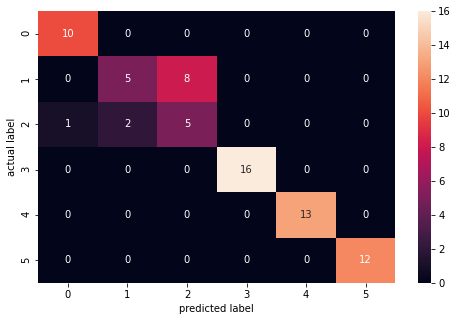

0.8472222222222222
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.71      0.38      0.50        13
           2       0.38      0.62      0.48         8
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        12

    accuracy                           0.85        72
   macro avg       0.83      0.83      0.82        72
weighted avg       0.87      0.85      0.84        72



In [18]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_prediksi), annot=True, fmt=".0f", ax=ax)
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()

print (ac)
print (cr)

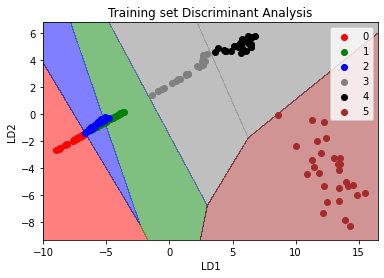

In [19]:
# Visualisasi Training Set

x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green', 'blue', 'grey', 'black', 'brown')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue', 'grey', 'black', 'brown'))(i), label = j)
plt.title('Training set Discriminant Analysis')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

## PERBANDINGAN DENGAN MODEL DECISIONTREE CLASSIFIER

In [20]:
classification = DecisionTreeClassifier()
classification.fit (x_train,y_train)

DecisionTreeClassifier()

In [21]:
y_pred = classification.predict(x_test)
print (y_pred)


[4 1 3 1 4 4 3 4 3 2 1 2 2 3 5 1 0 5 4 0 4 5 2 0 0 2 1 3 1 3 5 4 1 0 1 5 0
 5 0 3 3 4 3 1 4 2 4 0 5 5 0 3 5 2 3 3 5 3 5 4 1 3 3 5 2 3 1 3 0 1 0 4]


In [22]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score (y_test,y_pred)
cr = classification_report (y_test,y_pred)


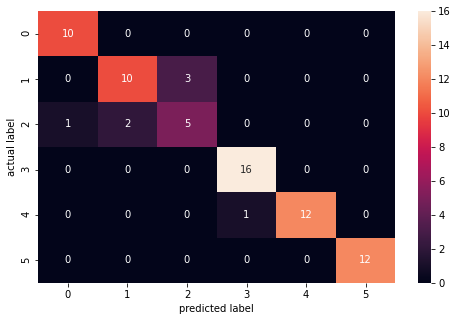

0.9027777777777778
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.83      0.77      0.80        13
           2       0.62      0.62      0.62         8
           3       0.94      1.00      0.97        16
           4       1.00      0.92      0.96        13
           5       1.00      1.00      1.00        12

    accuracy                           0.90        72
   macro avg       0.88      0.89      0.88        72
weighted avg       0.90      0.90      0.90        72



In [23]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()

print (ac)
print (cr)

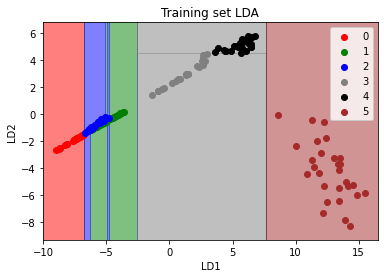

In [24]:
# Visualisasi Training Set

x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classification.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green', 'blue', 'grey', 'black', 'brown')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue', 'grey', 'black', 'brown'))(i), label = j)
plt.title('Training set LDA')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

# ##PERBANDINGAN DENGAN LOGISTIC REGRESSION

In [25]:
mesin_klasifikasi = LogisticRegression(random_state = 0)
mesin_klasifikasi.fit(x_test, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=0)

In [26]:
y_prediction = klasifikasi.predict(x_train)
print (y_prediction)

NameError: name 'klasifikasi' is not defined

In [ ]:
cm = confusion_matrix(y_train, y_prediction)
ac = accuracy_score (y_train,y_prediction)
cr = classification_report (y_train,y_prediction)

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_train, y_prediction), annot=True, fmt=".0f", ax=ax)
plt.xlabel("predicted 2 label")
plt.ylabel("actual 2 label")
plt.show()

print (ac)
print (cr)

In [ ]:
# Visualisasi Training Set

x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, klasifikasi.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green', 'blue', 'grey', 'black', 'brown')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue', 'grey', 'black', 'brown'))(i), label = j)
plt.title('Training set LDA')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()